In [1]:
import tensorflow as tf

In [2]:
import imperative

ImportError: No module named imperative

# Install imperative

In [3]:
import os
print os.getcwd()

/home/yaroslavvb/lbfgs


In [4]:
import urllib2
response = urllib2.urlopen('https://raw.githubusercontent.com/yaroslavvb/imperative/georgia/release/imperative.py')
with open("imperative.py", "w") as f:
  f.write(response.read())
import imperative
env = imperative.Env(tf)

In [5]:
env.tf.add(1, 2)

ITensor(3, dtype=int32)

# Initialize everything

In [5]:
import tensorflow as tf
import imperative
env = imperative.Env(tf)
print env.tf.add(1, 2)

from tensorflow.python.client import device_lib
device_lib.list_local_devices()

ITensor(3, dtype=int32)


[name: "/cpu:0"
 device_type: "CPU"
 memory_limit: 268435456
 bus_adjacency: BUS_ANY
 incarnation: 14233655971873946591, name: "/gpu:0"
 device_type: "GPU"
 memory_limit: 203292672
 incarnation: 8925167128940909974
 physical_device_desc: "device: 0, name: GeForce GTX 1080, pci bus id: 0000:03:00.0", name: "/gpu:1"
 device_type: "GPU"
 memory_limit: 3838050304
 incarnation: 17185581707596145240
 physical_device_desc: "device: 1, name: GeForce GTX 980, pci bus id: 0000:04:00.0"]

# Try power benchmark

In [8]:
import time
n = 2024
num_iters = 10
print("Trying %d power iterations with %d x %d matrices" %(num_iters, n, n))

n_ops = n**3+n*n*(n-1)  # n**3 muls, n**2*(n-1) adds
a = env.tf.ones((n, n), dtype=tf.float32)/n
b = env.tf.ones((n, n), dtype=tf.float32)/n
speeds = []
for i in range(num_iters):
    start_time = time.time()
    b = env.tf.matmul(a, b)
    elapsed_time = time.time() - start_time
    speed = n_ops/elapsed_time/10**9
    speeds.append(speed)
    print("%s T ops/sec" %(speeds[-1]))
    
print("max speed: %s T ops/sec" %(max(speeds)))

Trying 10 power iterations with 2024 x 2024 matrices
79.694122151 T ops/sec
4676.93757145 T ops/sec
4886.28401463 T ops/sec
4067.42558565 T ops/sec
4662.19965218 T ops/sec
4545.77419182 T ops/sec
4731.35386897 T ops/sec
2527.5965182 T ops/sec
4715.31211855 T ops/sec
4680.71538855 T ops/sec
max speed: 4886.28401463 T ops/sec


In [19]:
def run_benchmark():
  import time
  n = 2024
  num_iters = 50

  n_ops = n**3+n*n*(n-1)  # n**3 muls, n**2*(n-1) adds
  a = env.tf.ones((n, n), dtype=tf.float32)/n
  b = env.tf.ones((n, n), dtype=tf.float32)/n
  speeds = []
  for i in range(num_iters):
    start_time = time.time()
    b = env.tf.matmul(a, b)
    elapsed_time = time.time() - start_time
    speed = n_ops/elapsed_time/10**9
    speeds.append(speed)
    
  return speeds

In [11]:
run_benchmark()

[76.05042687402187,
 4589.8817037796625,
 4886.2840146343815,
 4951.698911362379,
 5015.99277301175,
 4244.442886666781,
 4876.346971406864,
 4934.130973693457,
 2818.5605695862305,
 4524.772762380394]

## Make plot of power benchmark on two cards

In [3]:
import pkg_resources
pkg_resources.require("matplotlib")
%matplotlib inline
import matplotlib.pyplot as plt

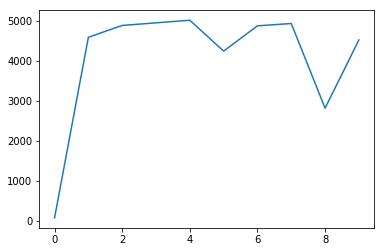

In [12]:
plt.plot(_11)

In [20]:
with env.g.device("cpu:0"):
  speeds1 = run_benchmark()
with env.g.device("gpu:0"):
  speeds2 = run_benchmark()
with env.g.device("gpu:1"):
  speeds3 = run_benchmark()

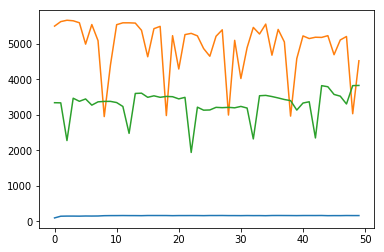

In [22]:
xs = range(50)
plt.plot(xs, speeds1, xs, speeds2, xs, speeds3)

In [31]:
default_context = env.g.as_default()
default_context.__enter__()

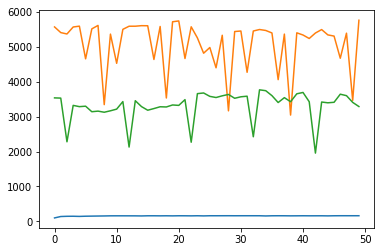

In [33]:
import tensorflow as tf
with tf.device("cpu:0"):
  speeds1 = run_benchmark()
with tf.device("gpu:0"):
  speeds2 = run_benchmark()
with tf.device("gpu:1"):
  speeds3 = run_benchmark()
xs = range(50)
plt.plot(xs, speeds1, xs, speeds2, xs, speeds3)

# Simple loop

In [23]:
old_tf = tf
tf = env.tf

In [25]:
a = tf.ones((3, 3))
b = a
while True:
  a = tf.matmul(a, b)
  if tf.reduce_sum(a)>100:
    break
print a  

ITensor([[ 27.  27.  27.]
 [ 27.  27.  27.]
 [ 27.  27.  27.]], dtype=float32)


In [26]:
print a.as_numpy()

[[ 27.  27.  27.]
 [ 27.  27.  27.]
 [ 27.  27.  27.]]


# Plot of l-BFGS times

In [28]:
torch=[0.16,0.17,0.17,0.17,0.18,0.21,0.17,0.16,0.17,0.16,0.16,0.16,0.17,0.16,0.16,0.17,0.16,0.16,0.16,0.16,0.17,0.18,0.17,0.18,0.17,0.17,0.17,0.17,0.18,0.17,0.17,0.17,0.17,0.17,0.17,0.17,0.18,0.18,0.18,0.18,0.21,0.18,0.18,0.18,0.20,0.19,0.19,0.19,0.21,0.19,0.21,0.20,0.20,0.22,0.20,0.20,0.21,0.22,0.23,0.23,0.23,0.23,0.24,0.24,0.24,0.25,0.28,0.28,0.31,0.29,0.29,0.30,0.32,0.36,0.35,0.34,0.36,0.38,0.40,0.40,0.42,0.43,0.44,0.47,0.50,0.49,0.47,0.49,0.48,0.50,0.50,0.54,0.51,0.54,0.53,0.54,0.51,0.54,0.55]
tf=[0.25,0.18,0.18,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.21,0.20,0.20,0.20,0.20,0.20,0.19,0.20,0.19,0.20,0.21,0.20,0.20,0.19,0.20,0.21,0.20,0.20,0.20,0.19,0.21,0.20,0.20,0.20,0.20,0.21,0.20,0.20,0.20,0.20,0.21,0.20,0.19,0.20,0.19,0.21,0.20,0.21,0.21,0.22,0.21,0.22,0.20,0.20,0.20,0.20,0.20,0.25,0.21,0.20,0.20,0.21,0.20,0.20,0.21,0.20,0.20,0.20,0.20,0.21,0.20,0.20,0.20,0.20,0.21,0.20,0.20,0.21,0.21,0.21,0.20,0.20,0.20,0.20,0.21,0.20,0.20,0.21,0.20,0.21,0.21,0.20,0.21,0.20,0.21,0.20,0.20,0.20,0.20]

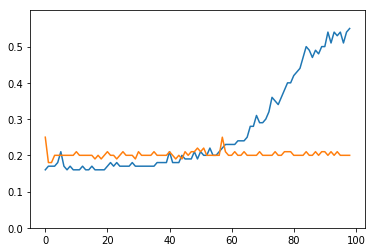

In [30]:
xs = range(len(torch))
plt.ylim([0,0.6])
plt.plot(xs, torch, xs, tf)

In [ ]:
env.